# Activation Functions

This functions are located at the end of the neural network. Are created to put a threshold level to activate the output layer.
There are two main types of activaction functions, Sigmoid and ReLu.

### Sigmoid 
$$sigmoid(x) = \sigma (x) = \frac{1}{1+e^x}$$

### ReLu (Rectificador lineal unitario)
$$f(x) = max(0,x)$$

Library import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


session = tf.Session()
%config Completer.use_jedi = False

Set Random seed values and batch size

In [2]:
tf.set_random_seed(2019)
np.random.seed(2019)
batch_size = 50

Tensorflow variables and X distribution

In [3]:
a1 = tf.Variable(tf.random_normal(shape = [1,1]))
b1 = tf.Variable(tf.random_normal(shape = [1,1]))

a2 = tf.Variable(tf.random_normal(shape = [1,1]))
b2 = tf.Variable(tf.random_normal(shape = [1,1]))

x = np.random.normal(loc = 5, scale = 0.25, size = 1000)   #1000 values with std 0.25 and mean 5
x_data = tf.placeholder(shape = [None, 1], dtype = tf.float32 )

Definition of activation functions to test

In [4]:
sigmoid_act = tf.sigmoid(tf.add(tf.matmul(x_data, a1), b1))
relu_act = tf.nn.relu(tf.add(tf.matmul(x_data, a2), b2))

Target value and loss functions:

In [5]:
target = 0.75
loss1 = tf.reduce_mean(tf.square(tf.subtract(sigmoid_act, target)))
loss2 = tf.reduce_mean(tf.square(tf.subtract(relu_act, target)))

Backward propagation optimizer and training functions definition

In [6]:
learning_rate = 0.01

my_optim = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
train_step_sigmoid = my_optim.minimize(loss1)
train_step_relu = my_optim.minimize(loss2)

In [13]:
init = tf.global_variables_initializer()
session.run(init)

Training loop:

In [14]:
loss_vect_sigmoid = []
loss_vect_relu = []
activ_sigmoid = []
activ_relu = []
for i in range(1000):
    rand_idx = np.random.choice(len(x), size = batch_size)
    x_vals = np.transpose([x[rand_idx]])
    session.run(train_step_sigmoid, feed_dict = {x_data: x_vals})
    session.run(train_step_relu, feed_dict = {x_data: x_vals})
    
    loss_vect_sigmoid.append(session.run(loss1, feed_dict = {x_data: x_vals}))
    loss_vect_relu.append(session.run(loss2, feed_dict = {x_data: x_vals}))
    
    activ_sigmoid.append(np.mean(session.run(sigmoid_act, feed_dict={x_data: x_vals})))
    activ_relu.append(np.mean(session.run(relu_act, feed_dict = {x_data: x_vals})))

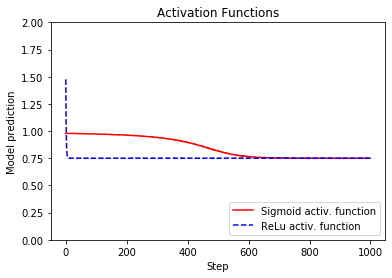

In [15]:
plt.plot(activ_sigmoid, 'r-', label = 'Sigmoid activ. function')
plt.plot(activ_relu, 'b--', label = 'ReLu activ. function')
plt.ylim([0.0, 2.0])
plt.title('Activation Functions')
plt.xlabel('Step')
plt.ylabel('Model prediction')
plt.legend(loc = 'lower right')

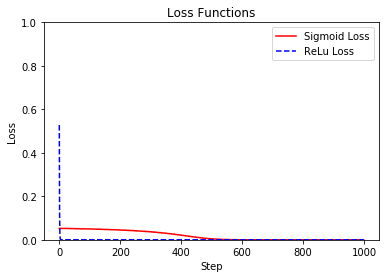

In [16]:
plt.plot(loss_vect_sigmoid, 'r-', label = 'Sigmoid Loss')
plt.plot(loss_vect_relu, 'b--', label = 'ReLu Loss')
plt.ylim([0., 1.])
plt.title('Loss Functions')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.legend(loc = 'upper right')
plt.show()